什么是图
  描述事物关系的一种方式
  怎么描述：节点+边；G=<V,E>；有向图和无向图；
  存储方式：邻接矩阵，空间复杂度为O(n^2)；邻接表，空间复杂度为O(n+m);可参照https://blog.csdn.net/qq_42370259/article/details/82015430
拓扑排序
  场景：有向无环图，有任务依赖；
  目的：找到一个任务排序，不违反任务依赖，每个节点只出现一次
  过程：见“算法学习笔记4-图论-拓扑过程.ipynb”
  实现
  实战：leetcode 127 Course Schedule
最短路
  G=<V,E>，E是具有权重的集合，长度最短的路即为最短路
单源最短路（Dijkstra）
  定义：给定图中一个点s，求到任一点的最短路径
  过程：每次找最近的点
  详细：见“算法学习笔记4-图论-Djikstra.ipynb”
  
任意两点最短路（Floyed）
  定义：图中每个点之间的最短路径
最小生成树（Prime，SPFA）


In [40]:
#拓扑排序
graph = {
    '7':'5,4',
    '5':'2,6,4',
    '6':'1,2',
    '2':'1',
    '4':'8,3',
    '8':'3',
    '1':'8,3',
    '3':''
}
#拓扑排序结果：75621483/75462183

def topological_sorting(graph):
    #建立每个节点的入度
    in_degrees = dict( (i,0) for i in graph )
    for i in graph:
        for j in graph[i].split(','):
            if j != '':
                in_degrees[j] += 1
    print(in_degrees)
    #入度为0的节点
    zero_degrees = [i for i in in_degrees if in_degrees[i] == 0]
    #从入度为0的节点开始，删除该节点及邻边，重新计算每个节点的入度
    topo_seq = []
    while zero_degrees:
        #从最后一个开始
        zero_e = zero_degrees.pop()
        topo_seq.append(zero_e)
        for zero_v in graph[zero_e].split(','):
            if zero_v != '':
                in_degrees[zero_v] -= 1
                if in_degrees[zero_v] == 0:
                    zero_degrees.append(zero_v)
    if len(in_degrees) == len(topo_seq):
        return topo_seq
    else:
        print('may be a circle gragh')
    
topological_sorting(graph)

{'7': 0, '5': 1, '6': 1, '2': 2, '4': 2, '8': 2, '1': 2, '3': 3}


['7', '5', '4', '6', '2', '1', '8', '3']

In [54]:
#leetcode 207 course schedule
#input 
from typing import List
class Solution:
    #入度表：入度为0的入队，删除该节点，度减一，重复
    #prerequisites : [[1,2],[3,4]] 二维数组 后顺序为：后一元素->前一元素
    def canFinish_BFS(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        if numCourses == 0 or len(prerequisites) == 0:
            return False
        #初始化入度表，邻接矩阵
        #indegrees的索引下标即为course的编号
        indegrees = [0 for i in range(numCourses)]
        adjacency_matrix = [[] for i in range(numCourses)]
        for curr_need_study,pre_need_study in prerequisites:
            indegrees[curr_need_study] += 1
            adjacency_matrix[curr_need_study].append(pre_need_study)
        #BFS 入度为0的先入队
        topo_seq = [i for i in range(len(indegrees)) if indegrees[i] == 0]
        while topo_seq:
            zero_indegree_index = topo_seq.pop()
            numCourses -= 1
            for curr_need_sutdy_indexs in range(len(adjacency_matrix)):
                if zero_indegree_index in adjacency_matrix[curr_need_sutdy_indexs]:
                    indegrees[curr_need_sutdy_indexs] -= 1
                    if indegrees[curr_need_sutdy_indexs] == 0:
                        topo_seq.append(curr_need_sutdy_indexs)
        return numCourses == 0

numCourses = 3
prerequisites = [[1,0],[2,1],[1,2]]
test = Solution()
test.canFinish_BFS(numCourses,prerequisites)

False

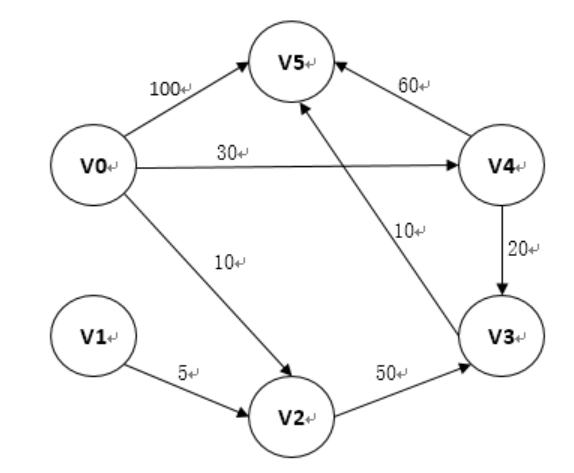

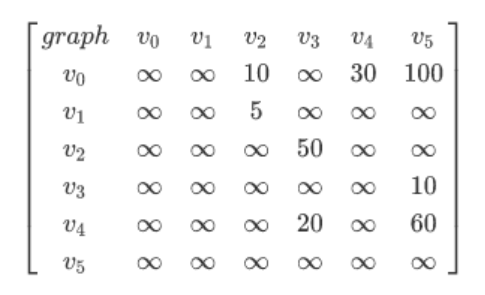

In [20]:
import sys
#构建邻接矩阵
max_val = 1000
graph = [
    [0,4,max_val,2,max_val],
    [4,0,4,1,max_val],
    [max_val,4,0,1,3],
    [2,1,1,0,7],
    [max_val,max_val,3,7,0]
]
#起始点为0，即计算点0到各点的距离
start_index = 0

def dijkstra(graph,start_index):
    #节点个数
    nodes_len = len(graph)
    #最短路径数组
    short_path = nodes_len * [0]
    #标记数组 0 未访问 ； 1 已访问
    visited_nodes = nodes_len * [0]
    #初始化，第一节点
    short_path[start_index] = 0
    visited_nodes[start_index] = 1
    
    for i in range(1,nodes_len):
        temp_nearest_node_index = -1
        temp_nearest_node_weight = sys.maxsize
        for j in range(nodes_len):
            if visited_nodes[j] == 0 and graph[start_index][j] < temp_nearest_node_weight:
                temp_nearest_node_index = j
                temp_nearest_node_weight = graph[start_index][j]
        #初始节点的最近点
        short_path[temp_nearest_node_index] = temp_nearest_node_weight
        #标记最近点
        visited_nodes[temp_nearest_node_index] = 1
        #基于temp_nearest_node_index，更新start_index到其他个点的距离
        for k in range(nodes_len):
            #grpah[start_index] 已存在start_index到k的距离
            #若graph[start_index][temp_nearest_node_index] + graph[temp_nearest_node_index][k] < graph[start_index][k]) 则更新
            if visited_nodes[k] == 0:
                graph[start_index][k] = min(graph[start_index][temp_nearest_node_index]+graph[temp_nearest_node_index][k],graph[start_index][k])
    
    return short_path

short_path_res = dijkstra(graph,start_index)          
for i in range(len(short_path_res)):
    print(start_index,'-->',i,':',short_path_res[i])

0 --> 0 : 0
0 --> 1 : 3
0 --> 2 : 3
0 --> 3 : 2
0 --> 4 : 6
